In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report

import time
import joblib

df = pd.read_csv('heart_disease_data.csv')
X = df.drop(['target'], axis = 1)
y = df.target

df_train = pd.read_csv('TrainingSet_df.csv')
df_test = pd.read_csv('TestingSet_df.csv')

X_train = df_train.drop(['target'], axis = 1)
X_test = df_test.drop(['target'], axis = 1)
y_train = df_train.target
y_test = df_test.target

kfold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [2]:
print("Random Forest - N = 75 w/o KFold\n")
str_time = time.time()
model = RandomForestClassifier(n_estimators = 75, random_state = 0) 
model.fit(X_train, y_train)
etr_time = time.time()
print("Training Time: " + str(etr_time - str_time))

stt_time = time.time()
y_pred = model.predict(X_test)
print('Accuracy:', model.score(X_test, y_test))
print(classification_report(y_test, y_pred))
ett_time = time.time()
print("Testing Time: " + str(ett_time - stt_time)) 

Random Forest - N = 75 w/o KFold

Training Time: 0.13784360885620117
Accuracy: 0.9153846153846154
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       176
           1       0.91      0.94      0.92       214

    accuracy                           0.92       390
   macro avg       0.92      0.91      0.91       390
weighted avg       0.92      0.92      0.92       390

Testing Time: 0.027293682098388672


In [3]:
print("Random Forest - N = 75 w/o KFold\n")
model = RandomForestClassifier(n_estimators = 75, random_state = 0)
scores = []
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print('Accuracy',str(i+1),'=',score)
    print('Classification Report',str(i+1),':\n',classification_report(y_test, y_pred))

print('Average Accuracy:', sum(scores) / len(scores))
joblib.dump(model,'RandomForest_75N_Model.joblib')

Random Forest - N = 75 w/o KFold

Accuracy 1 = 0.9747899159663865
Classification Report 1 :
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.97      0.98      0.98        64

    accuracy                           0.97       119
   macro avg       0.98      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119

Accuracy 2 = 0.9243697478991597
Classification Report 2 :
               precision    recall  f1-score   support

           0       0.94      0.89      0.91        54
           1       0.91      0.95      0.93        65

    accuracy                           0.92       119
   macro avg       0.93      0.92      0.92       119
weighted avg       0.93      0.92      0.92       119

Accuracy 3 = 0.8991596638655462
Classification Report 3 :
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        51
           1       0.91   

['RandomForest_75N_Model.joblib']

In [4]:
t_model = joblib.load('RandomForest_75N_Model.joblib')
def predictHeartDisease():
    print("Enter the Following Details:")
    age = int(input("Age: "))
    if (age <= 0 or age >= 100):
        print("INVALID INPUT!")
        return
    g = input("Sex (M/F): ")
    if (g == 'M' or g == 'm'):
        sex = 1
    elif (g == 'F' or g == 'f'):
        sex = 0
    else:
        print("INVALID INPUT!")
        return
    print("Chest Pain Type Codes:")
    print("1.Typical Angina\n2.Atypical Angina\n3.Non-Anginal Pain\n4.Asymptomatic")
    cpt = int(input("Chest Pain Type (1/2/3/4): "))
    if (cpt != 1 and cpt != 2 and cpt != 3 and cpt != 3 and cpt != 4):
        print("INVALID INPUT!")
        return
    rbps = int(input("Resting Blood Pressure (in mm Hg): "))
    if (rbps <= 50 or rbps >= 250):
        print("INVALID INPUT!")
        return
    chol = int(input("Serum Cholesterol (in mg/dl): "))
    if (chol < 0 or chol >= 2000):
        print("INVALID INPUT!")
        return
    bsugar = int(input("Fasting Blood Sugar (in mg/dl): "))
    if (bsugar < 0):
        print("INVALID INPUT!")
        return
    elif (bsugar <= 120):
        bsl = 0
    else:
        bsl = 1
    print("Resting Electrocardiogram Result Codes:")
    print("0.Normal\n1.ST-T Wave Abnormality\n2.Left Ventricular")
    rer = int(input("Resting Electrocardiogram Result (0/1/2): "))
    if (rer != 0 and rer != 1 and rer != 2):
        print("INVALID INPUT!")
        return
    maxhr = int(input("Maximum Heart Rate (71-202): "))
    if (maxhr > 205 or maxhr < 65):
        print("INVALID INPUT!")
        return
    g = input("Exercise Induced Angina (Y/N): ")
    if (g == 'Y' or g == 'y'):
        exeg = 1
    elif (g == 'N' or g == 'n'):
        exeg = 0
    else:
        print("INVALID INPUT!")
        return
    op = float(input("Oldpeak - ST: "))
    if (op > 10 or op < -10):
        print("INVALID INPUT!")
        return
    print("Slope of Peak Exercise ST Segment:")
    print("1.Upsloping\n2.Flat\n3.Downsloping")
    slst = int(input("Slope of Peak Exercise ST Segment (1/2/3): "))
    if (slst != 1 and slst != 2 and slst != 3):
        print("INVALID INPUT!")
        return
    test_data = {'1':[age], '2':[sex], '3':[cpt], '4':[rbps], '5':[chol], '6':[bsl], '7':[rer], '8':[maxhr], '9':[exeg], '10':[op], '11':[slst]}
    test = pd.DataFrame(test_data)
    test.columns = X.columns
    classRes = t_model.predict(test)
    if (classRes == 1):
        print("\nPatient has Heart Disease!")
        return
    elif (classRes == 0):
        print("\nPatient is Normal")
        return
    else:
        print("\nSome Anomaly Occured While Processing...")
        return

In [5]:
predictHeartDisease()

Enter the Following Details:
Age: 0
INVALID INPUT!


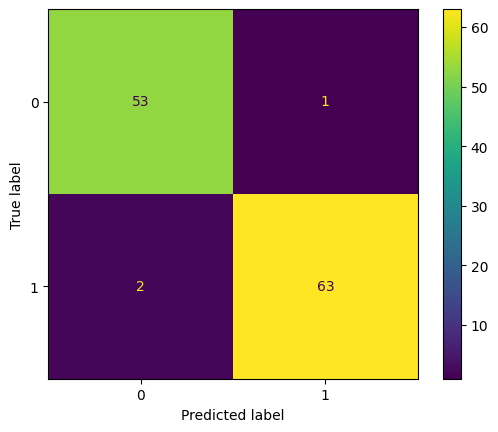

Accuracy 1 = 0.9747899159663865
Classification Report 1 :
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.97      0.98      0.98        64

    accuracy                           0.97       119
   macro avg       0.98      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119



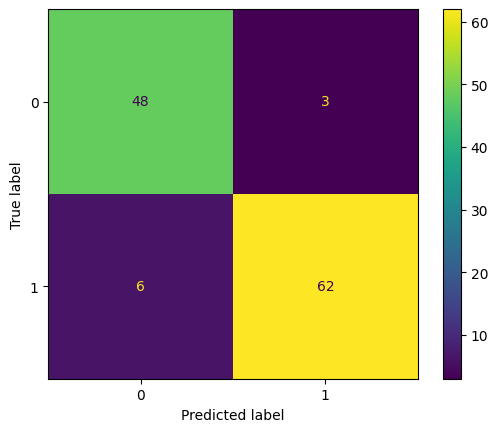

Accuracy 2 = 0.9243697478991597
Classification Report 2 :
               precision    recall  f1-score   support

           0       0.94      0.89      0.91        54
           1       0.91      0.95      0.93        65

    accuracy                           0.92       119
   macro avg       0.93      0.92      0.92       119
weighted avg       0.93      0.92      0.92       119



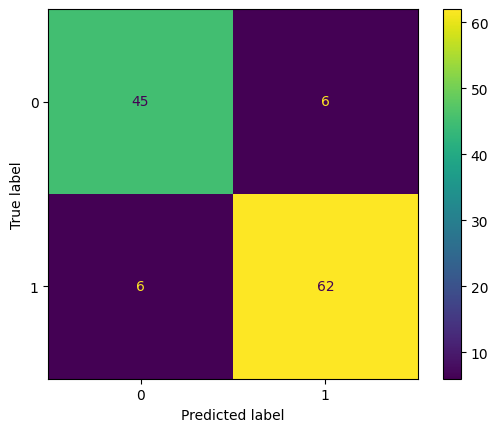

Accuracy 3 = 0.8991596638655462
Classification Report 3 :
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        51
           1       0.91      0.91      0.91        68

    accuracy                           0.90       119
   macro avg       0.90      0.90      0.90       119
weighted avg       0.90      0.90      0.90       119



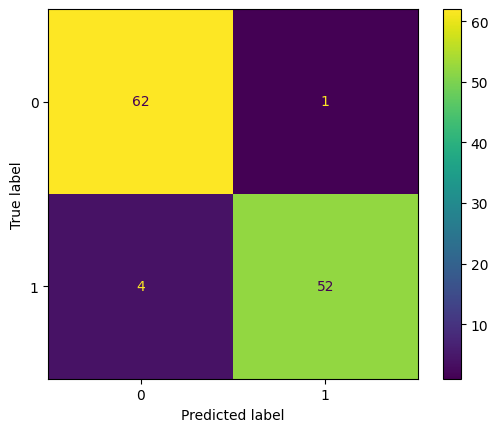

Accuracy 4 = 0.957983193277311
Classification Report 4 :
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        66
           1       0.93      0.98      0.95        53

    accuracy                           0.96       119
   macro avg       0.96      0.96      0.96       119
weighted avg       0.96      0.96      0.96       119



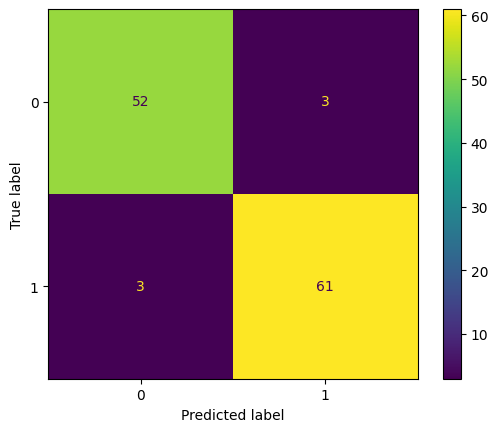

Accuracy 5 = 0.9495798319327731
Classification Report 5 :
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.95      0.95      0.95        64

    accuracy                           0.95       119
   macro avg       0.95      0.95      0.95       119
weighted avg       0.95      0.95      0.95       119



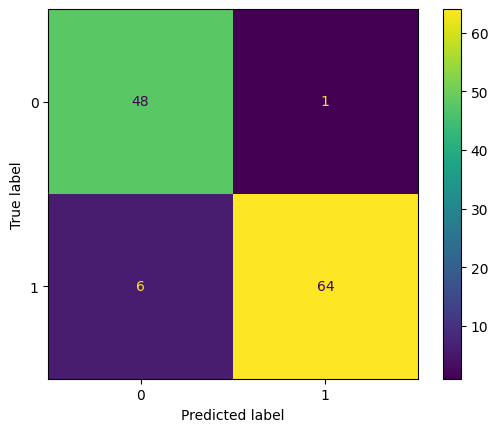

Accuracy 6 = 0.9411764705882353
Classification Report 6 :
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        54
           1       0.91      0.98      0.95        65

    accuracy                           0.94       119
   macro avg       0.95      0.94      0.94       119
weighted avg       0.94      0.94      0.94       119



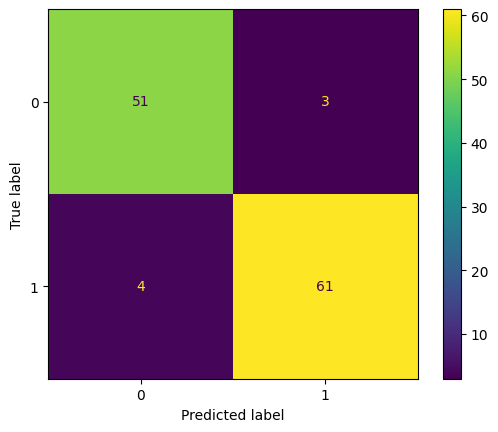

Accuracy 7 = 0.9411764705882353
Classification Report 7 :
               precision    recall  f1-score   support

           0       0.94      0.93      0.94        55
           1       0.94      0.95      0.95        64

    accuracy                           0.94       119
   macro avg       0.94      0.94      0.94       119
weighted avg       0.94      0.94      0.94       119



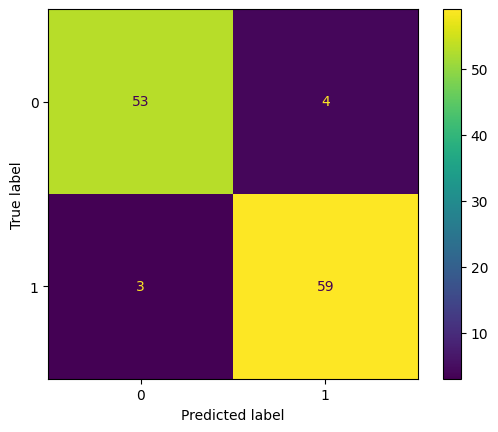

Accuracy 8 = 0.9411764705882353
Classification Report 8 :
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        56
           1       0.95      0.94      0.94        63

    accuracy                           0.94       119
   macro avg       0.94      0.94      0.94       119
weighted avg       0.94      0.94      0.94       119



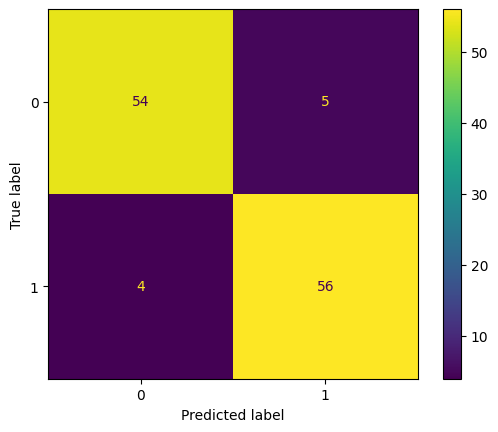

Accuracy 9 = 0.9243697478991597
Classification Report 9 :
               precision    recall  f1-score   support

           0       0.92      0.93      0.92        58
           1       0.93      0.92      0.93        61

    accuracy                           0.92       119
   macro avg       0.92      0.92      0.92       119
weighted avg       0.92      0.92      0.92       119



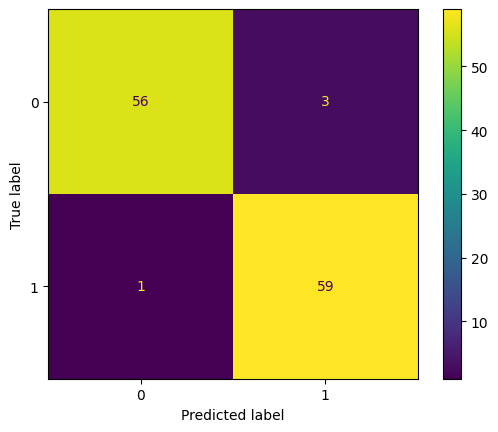

Accuracy 10 = 0.9663865546218487
Classification Report 10 :
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        57
           1       0.98      0.95      0.97        62

    accuracy                           0.97       119
   macro avg       0.97      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119

Average Accuracy: 0.9420168067226891


In [7]:
import matplotlib.pyplot as plt
from sklearn import metrics

model = joblib.load('RandomForest_75N_Model.joblib')
scores = []
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    cm = metrics.confusion_matrix(y_pred,y_test)
    cm_display = metrics.ConfusionMatrixDisplay(cm)
    cm_display.plot()
    plt.show()
    print('Accuracy',str(i+1),'=',score)
    print('Classification Report',str(i+1),':\n',classification_report(y_test, y_pred))

print('Average Accuracy:', sum(scores) / len(scores))